In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def unnormed_pdf(x):
    return np.exp(-x**2/3)

regions = [(-3,-1), (0,1), (3,6)]
regions = sorted(regions, key=lambda x: x[0])

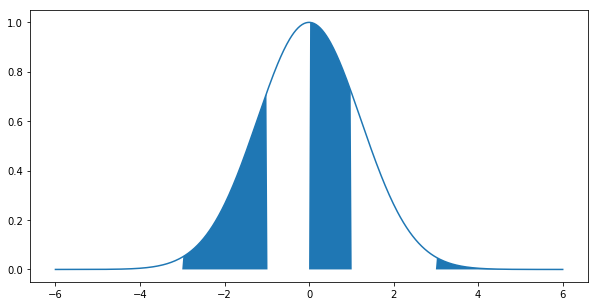

In [3]:
figsize(10,5)
x = np.linspace(-6,6,501)
y0 = unnormed_pdf(x)
y1 = np.zeros_like(y0)

for a,b in regions:
    idx = (x>a)&(x<b) 
    y1[idx] = y0[idx]

plot(x, y0)
fill(x, y1)

In [4]:
 np.array(list(b-a for a,b in regions))

array([2, 1, 3])

In [5]:
# Note -- not vectorization optimized. Rework needed. 
def rmap(regions):
    l = np.array(list(b-a for a,b in regions)).sum()
    def f(t):
        t = t * l
        for (a,b) in regions:
            delta = b - a
            if t < delta:
                return a + t
            t = t - delta
    return np.vectorize(f)

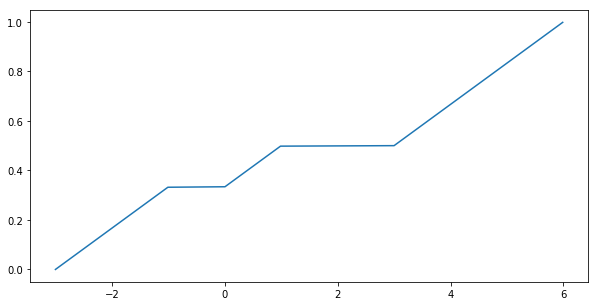

In [6]:
t = np.linspace(0,1, 501)
rf = rmap(regions)
plot(rf(t),t)

In [7]:
rf(-1)

array(-9)

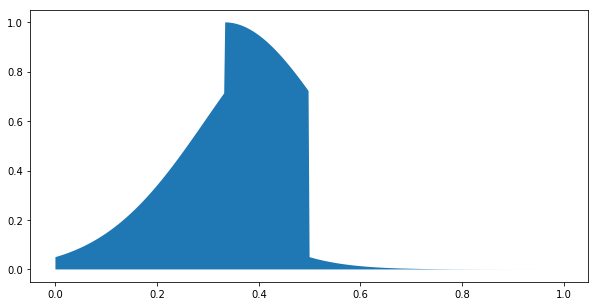

In [8]:
fill_between(t, unnormed_pdf(rf(t)))

In [24]:
N, dstep = 100000, 0.01
t = np.random.uniform()
sample = np.zeros(N)

rejects = 0
oldp = unnormed_pdf(rf(t))
for i in range(N):
    d = np.random.uniform(low=-dstep, high=dstep)
    while t + d < 0 or t + d > 1:
        rejects += 1
        d = np.random.uniform(low=-dstep, high=dstep)
    
    newp = unnormed_pdf(rf(t + d))
    alpha, u = newp / oldp , np.random.uniform()
    if u <= alpha: 
        t = t + d
        oldp = newp
    sample[i] = rf(t)
    
print("Rejects: {}/{}".format(rejects, N))

Rejects: 50/100000


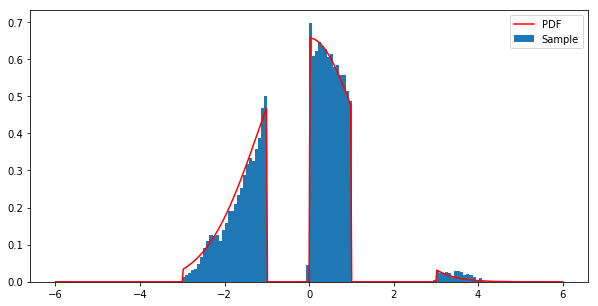

In [23]:
hist(sample, bins=100, density=True, label='Sample');
plot(x,  y1 / (y1.sum() * (x[1] - x[0])), 'r', label='PDF')
legend()

In [13]:
rejects

282

In [31]:
x[1] - x[0]

0.02400000000000002